# Welcome

The code provided below is the series that represents loading the EEG, making a BIDS file and also preprocessing the eeg data.The EEG signal was recorded from a BioSemi system of 64 electrode. The experiment has a task that where a tactile stimulation is provided to the tip of the index finger. 

## Loading the Data 

The MNE python use input function which is i.o here to read the data. It can read data format such as BrainVision (.vhdr ), EDF (European data format ), BioSemi (.BDF ). However remember when you load the .vhdr file some Verbose error may arise prior to loading. Please carefully take help from the documentation or just past the code errro into chatGpt and it will show you the solution.

Remember the path here will not be valid for you as ur data will be in other location so make sure to use your path. Just go to the file explorer and click the top which will show you the path. 

In [1]:
!pip install mne 
import mne 
%matplotlib inline  
!pip install mne-bids 
from mne_bids import write_raw_bids, BIDSPath 

In [2]:
#raw = mne.io.read_raw_brainvision('C:/Users/uSer/Downloads/EEG_data_PSY4061/EEG_data_PSY4061/Raw/Participant_05.vhdr', preload=True) 
raw = mne.io.read_raw_bdf('C:/Users/uSer/Downloads/EEG_data_PSY4061/EEG_data_PSY4061/Raw/P_04.bdf', preload= True)
#preload = true will load the data in the RAM memory of the python and if false it will not be loaded in the environment you are coding




Extracting EDF parameters from C:\Users\uSer\Downloads\EEG_data_PSY4061\EEG_data_PSY4061\Raw\P_04.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3514367  =      0.000 ...  1716.000 secs...


In [5]:
import os # important to integrate python with operating system to check the path.
print(os.path.isfile('C:/Users/uSer/Downloads/EEG_data_PSY4061/EEG_data_PSY4061/Raw/Participant_05.vhdr')) # It check whether the path is correct or not
# Very important sometimes you might not be in the write path where your EEG file is.

True


In [6]:
raw.info # it shows the basic information of the loaded data.



<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 79 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2025-04-08 17:25:23 UTC
 nchan: 80
 projs: []
 sfreq: 2048.0 Hz
 subject_info: <subject_info | his_id: >
>

## Creating a Brain Imaging Data Structure file 

BIDS is the highly recommended process to ensure the data is understood to other researchers. It is done by creating multiple file that store the data 
that inculdes events names , participant info and any other information. 

In [8]:
bids_path = BIDSPath(
    subject='04',     # subject ID
    session='001',    # optional: session number
    task='Touchperception',      # name of the task (e.g., rest, eyesopen, memory)
    datatype='eeg',   # this is EEG data
    root='bids_output'  # root folder where the BIDS dataset will be saved
)

In [9]:
import os
print(os.path.abspath('bids_output')) # check the path where your BIDS file is created.

C:\Users\uSer\bids_output


In [9]:
import pandas as pd
events = mne.find_events(raw, stim_channel='Status')
print(events[: 40])  # show first 10 vents
#Step 2: Get sampling frequency
#sfreq = raw.info['sfreq']  # in Hz (samples per second)

#Step 3: Convert to DataFrame
events_df = pd.DataFrame(events, columns=['Sample', 'Previous', 'Event ID'])

#Step 4: Add a new column for time in seconds
events_df['Time (s)'] = events_df['Sample'] / sfreq

#Step 5: Show first 10 rows
print(events_df.head(40))

Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2520 events found on stim channel Status
Event IDs: [  1   2  10  21  22  24  31  33  35  41  42  44  51  53  55  62  72  82
  92 121 131 141 151 162 172 182 192]
[[338591      0     53]
 [339310      0     51]
 [340337      0     92]
 [341515      0    131]
 [342133      0    172]
 [345661      0     10]
 [352085      0      2]
 [352185      2     55]
 [353098      0     51]
 [354125      0     92]
 [355327      0    151]
 [356355      0    192]
 [359773      0     10]
 [362243      0      2]
 [362339      2     33]
 [363459      0     31]
 [364077      0     72]
 [364832      0    131]
 [365450      0    172]
 [368972      0     10]
 [370697      0      1]
 [370801      1     35]
 [371459      0     31]
 [372077      0     72]
 [373343      0    151]
 [374370      0    192]
 [377489      0     10]
 [379093      0 

NameError: name 'sfreq' is not defined

In [11]:
import numpy as np
from mne_bids import write_raw_bids

# Find all events first
events = mne.find_events(raw, stim_channel='Status')

event_id = {
    'ShortShort': [22, 33],
    'LongLong' : [44, 55], 
    'InitiationOfTask': 10,
}

# All event codes to exclude
exclude_event_codes = [1, 2, 24, 31, 33, 35, 41, 42, 44, 51, 53, 55, 62, 72, 82,
                       92, 121, 131, 141, 151, 162, 172, 182, 192]

# Filter events to exclude unwanted codes
events_filtered = np.array([e for e in events if e[2] not in exclude_event_codes])

# Write BIDS with filtered events only
write_raw_bids(
    raw=raw,
    bids_path=bids_path,
    events=events_filtered,
    event_id=event_id,
    overwrite=True,
    format = 'BrainVision',
    allow_preload=True
)

Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2520 events found on stim channel Status
Event IDs: [  1   2  10  21  22  24  31  33  35  41  42  44  51  53  55  62  72  82
  92 121 131 141 151 162 172 182 192]
Writing 'bids_output\participants.tsv'...
Writing 'bids_output\participants.json'...
Used Annotations descriptions: ['no_touch', 'other', 'touch']
Writing 'bids_output\sub-04\ses-001\eeg\sub-04_ses-001_task-Touchperception_events.tsv'...
Writing 'bids_output\sub-04\ses-001\eeg\sub-04_ses-001_task-Touchperception_events.json'...
Writing 'bids_output\dataset_description.json'...
Writing 'bids_output\sub-04\ses-001\eeg\sub-04_ses-001_task-Touchperception_eeg.json'...
Writing 'bids_output\sub-04\ses-001\eeg\sub-04_ses-001_task-Touchperception_channels.tsv'...
Copying data files to sub-04_ses-001_task-Touchperception_eeg.vhdr


C:\Users\uSer\AppData\Local\Temp\ipykernel_26780\1862613201.py:22: RuntimeWarning: Converting data files to BrainVision format
  write_raw_bids(
C:\Users\uSer\AppData\Local\Temp\ipykernel_26780\1862613201.py:22: RuntimeWarning: Encountered data in "int" format. Converting to float32.
  write_raw_bids(
C:\Users\uSer\anaconda3\Lib\site-packages\pybv\io.py:682: UserWarning: Encountered unsupported non-voltage units: n/a
Note that the BrainVision format specification supports only µV.
  warn(msg)


Writing 'bids_output\sub-04\ses-001\sub-04_ses-001_scans.tsv'...
Wrote bids_output\sub-04\ses-001\sub-04_ses-001_scans.tsv entry with eeg\sub-04_ses-001_task-Touchperception_eeg.vhdr.


BIDSPath(
root: bids_output
datatype: eeg
basename: sub-04_ses-001_task-Touchperception_eeg.vhdr)

In [12]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 79 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2025-04-08 17:25:23 UTC
 nchan: 80
 projs: []
 sfreq: 2048.0 Hz
 subject_info: <subject_info | his_id: >
>

# Preprocessing 

It is good to create the copy file [(raw.copy()] of the raw file and also reference the specific electrode, but here the referencing was done to the average of signal that arose from the whole electrode.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   17.7s


Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2520 events found on stim channel Status
Event IDs: [  1   2  10  21  22  24  31  33  35  41  42  44  51  53  55  62  72  82
  92 121 131 141 151 162 172 182 192]
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2520 events found on stim channel Status
Event IDs: [  1   2  10  21  22  24  31  33  35  41  42  44  51  53  55  62  72  82
  92 121 131 141 151 162 172 182 192]
Using matplotlib as 2D backend.


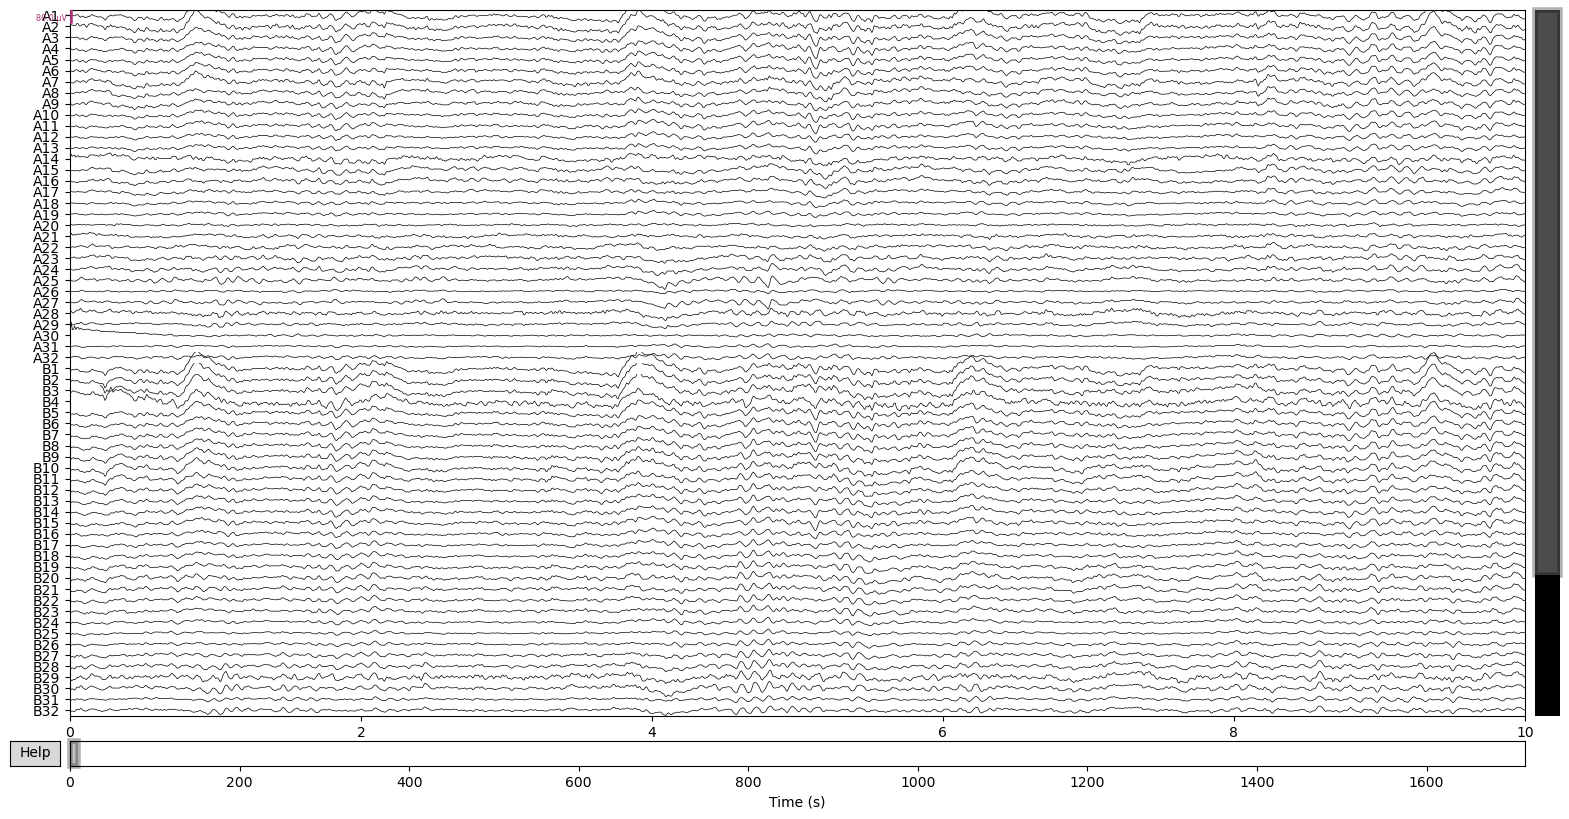

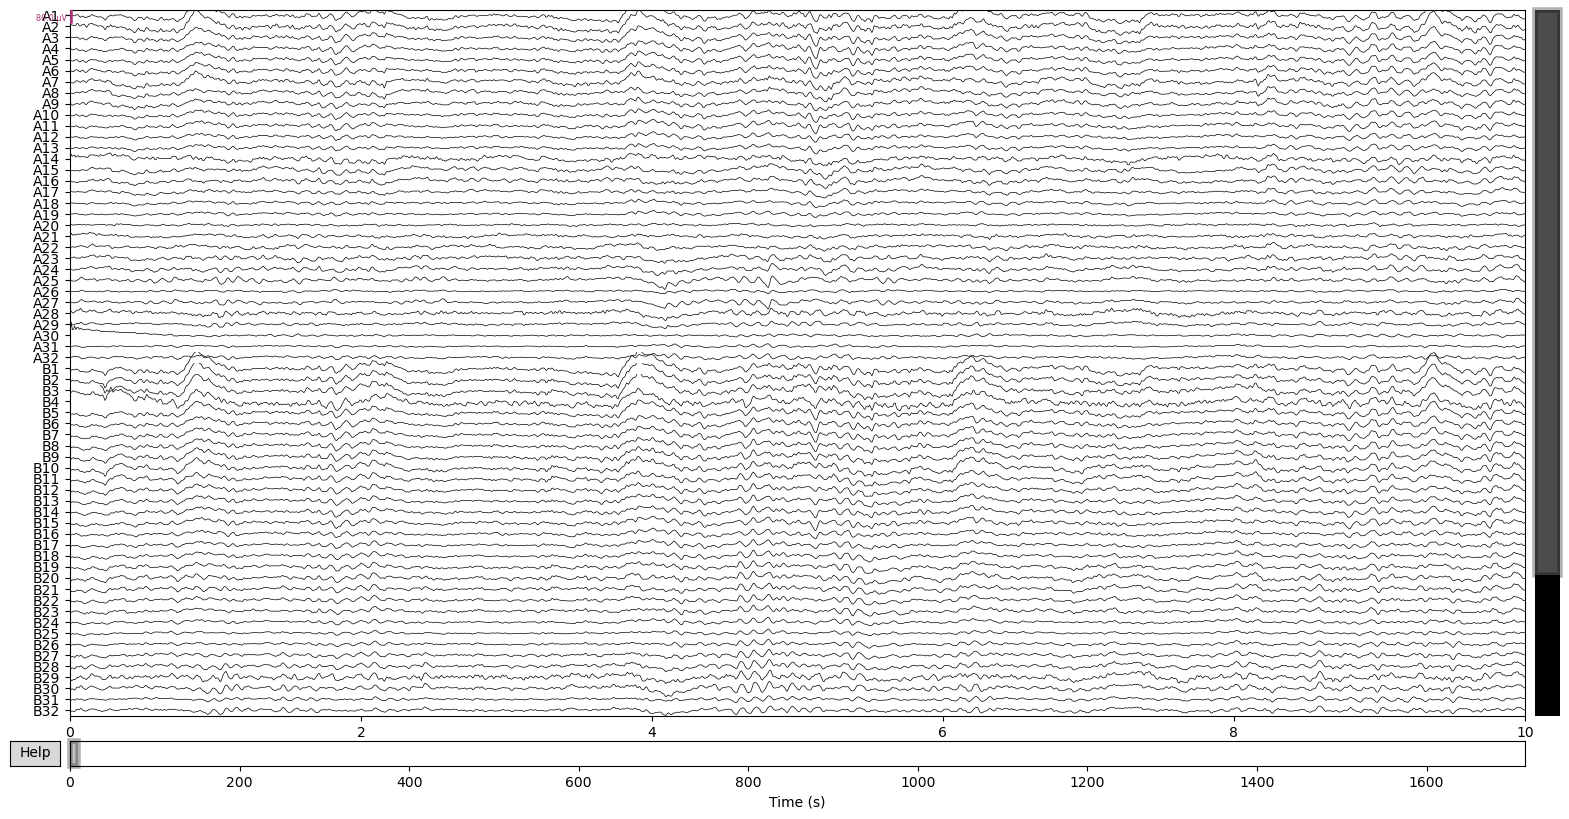

In [14]:
raw_copy = raw.copy()  # this duplicates the data

# Now you can safely modify the copy
raw_copy.filter(1, 40)
raw_copy.resample(1000)
#raw_copy.set_eeg_reference('average') Doing this gets the chart crazy so dint average the eeg before you dont show the non eeg data
raw_copy.plot(n_channels=64, scalings = {'eeg': 40e-6})

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\uSer\AppData\Local\Temp\ipykernel_26780\2723279181.py:1: RuntimeWarning: The unit for channel(s) EXG5, EXG6, EXG7, EXG8, Erg1, Erg2, GSR1, GSR2, Plet, Temp has changed from V to NA.
  raw_copy.set_channel_types({


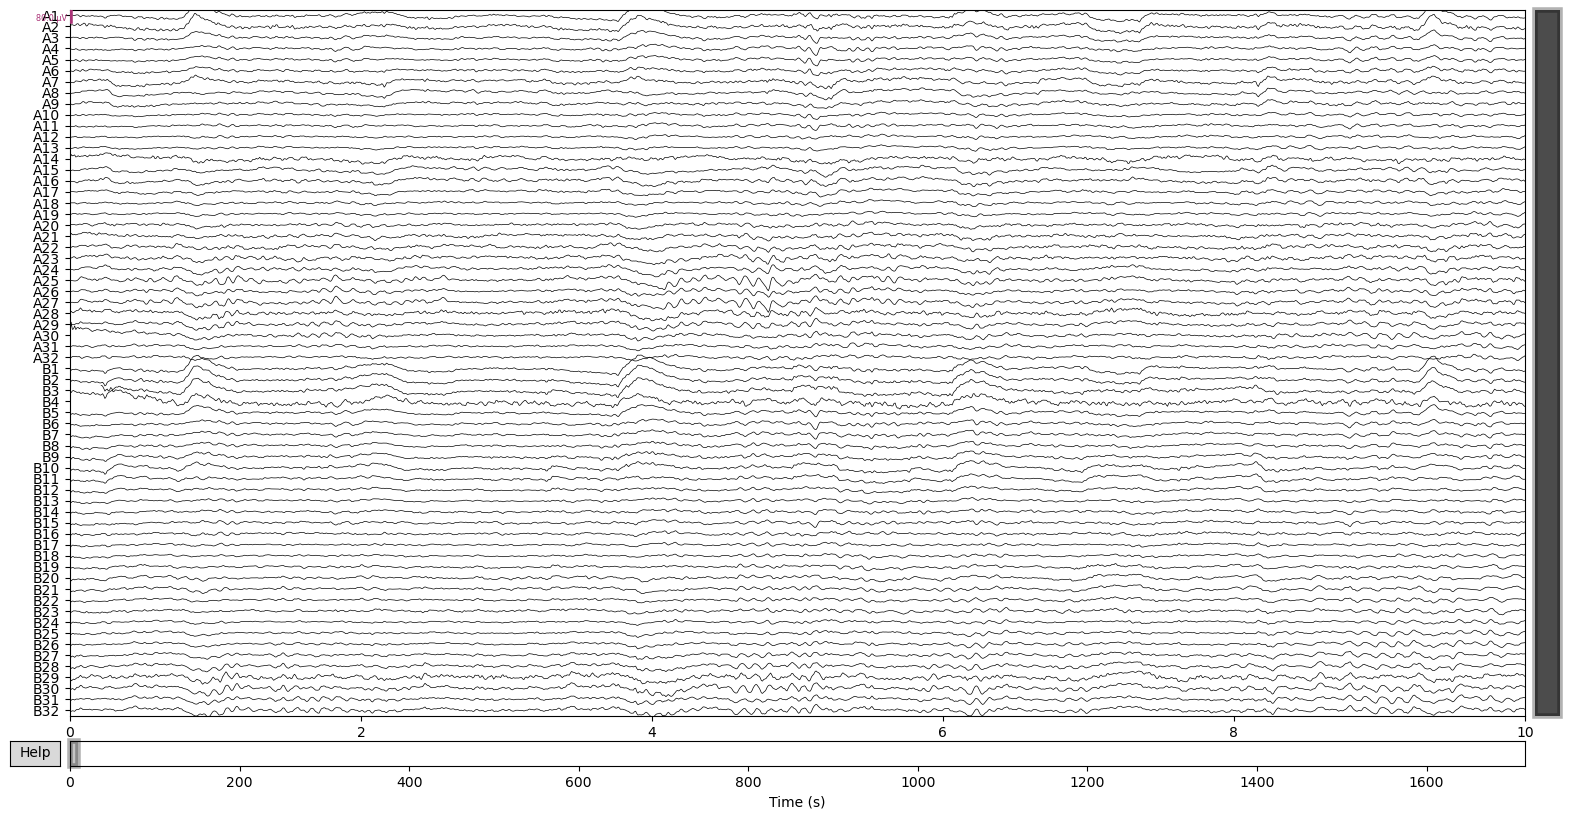

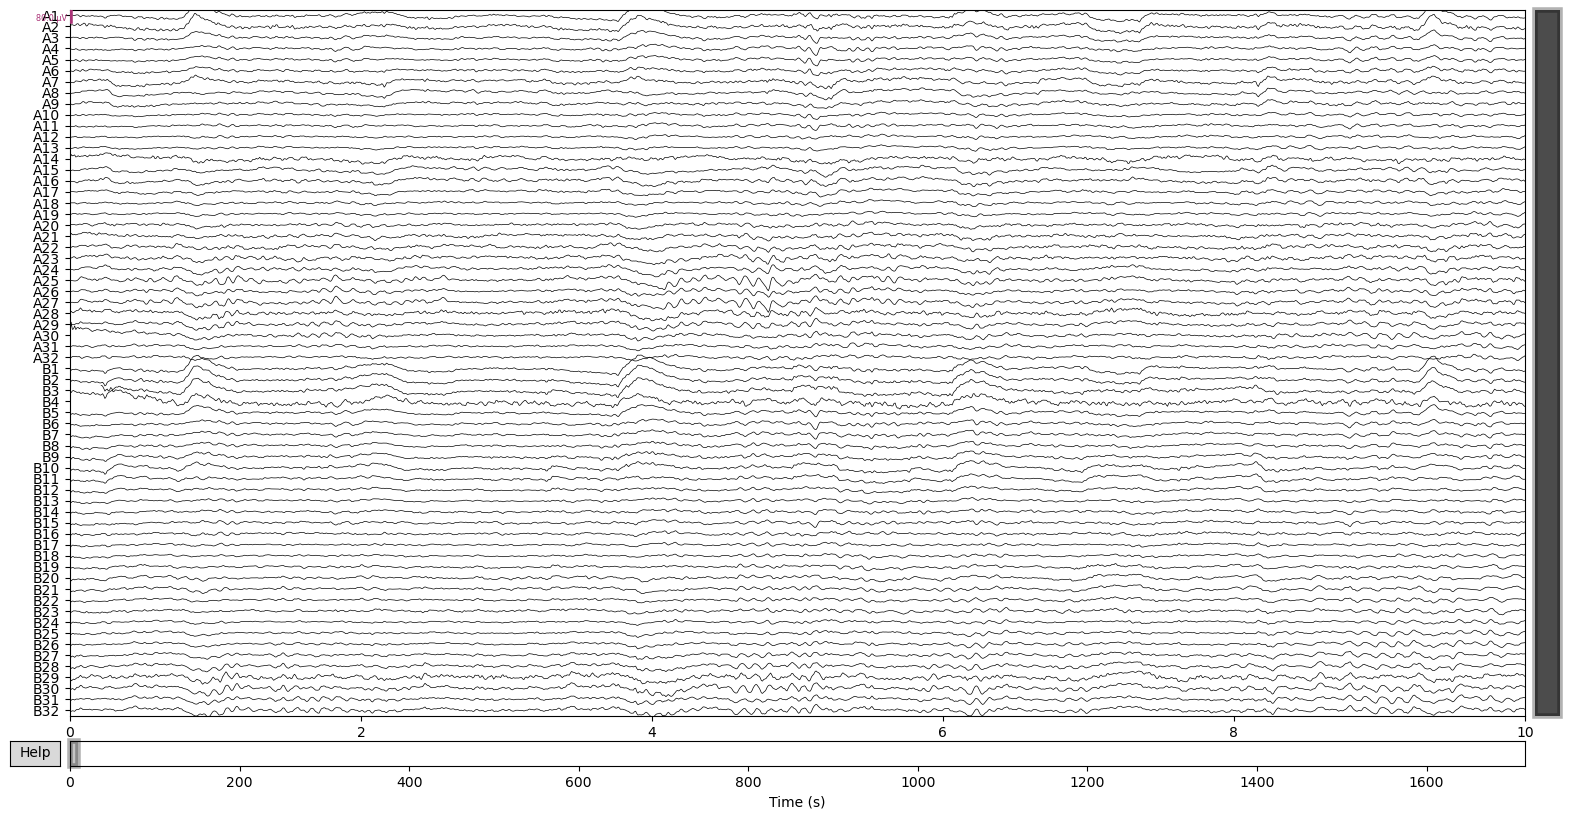

In [15]:
raw_copy.set_channel_types({
    'EXG1': 'eog',
    'EXG2': 'eog',
    'EXG3': 'eog',
    'EXG4': 'eog',
    'EXG5': 'misc',
    'EXG6': 'misc',
    'EXG7': 'misc',
    'EXG8': 'misc',
    'GSR1': 'misc',
    'GSR2': 'misc',
    'Erg1': 'misc',
    'Erg2': 'misc',
    'Resp': 'resp',
    'Plet': 'misc',
    'Temp': 'misc',
}) # this is really important as it will not take other channels to reference to itself.
raw_copy.set_eeg_reference('average')
raw_copy.plot(picks='eeg', n_channels=64, scalings = {'eeg': 40e-6})


['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']


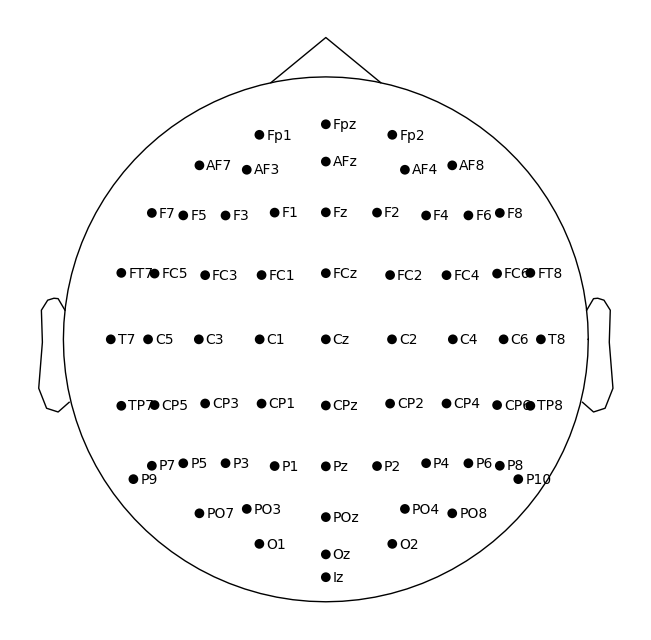

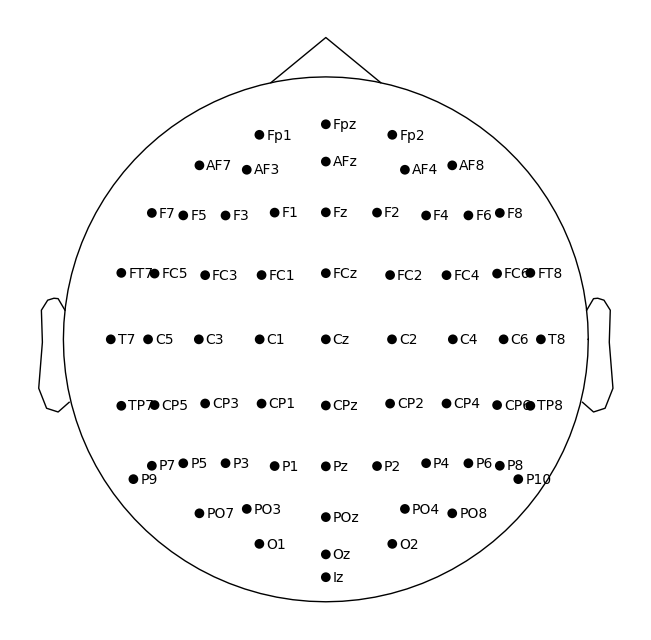

In [16]:
print(raw_copy.ch_names)

renamed_montage = {
    'A1': 'Fp1', 'A2': 'AF7', 'A3': 'AF3', 'A4': 'F1', 'A5': 'F3', 'A6': 'F5', 'A7': 'F7', 'A8': 'FT7',
    'A9': 'FC5', 'A10': 'FC3', 'A11': 'FC1', 'A12': 'C1', 'A13': 'C3', 'A14': 'C5', 'A15': 'T7', 'A16': 'TP7',
    'A17': 'CP5', 'A18': 'CP3', 'A19': 'CP1', 'A20': 'P1', 'A21': 'P3', 'A22': 'P5', 'A23': 'P7', 'A24': 'P9',
    'A25': 'PO7', 'A26': 'PO3', 'A27': 'O1', 'A28': 'Iz', 'A29': 'Oz', 'A30': 'POz', 'A31': 'Pz', 'A32': 'CPz',
    'B1': 'Fpz', 'B2': 'Fp2', 'B3': 'AF8', 'B4': 'AF4', 'B5': 'AFz', 'B6': 'Fz', 'B7': 'F2', 'B8': 'F4',
    'B9': 'F6', 'B10': 'F8', 'B11': 'FT8', 'B12': 'FC6', 'B13': 'FC4', 'B14': 'FC2', 'B15': 'FCz', 'B16': 'Cz',
    'B17': 'C2', 'B18': 'C4', 'B19': 'C6', 'B20': 'T8', 'B21': 'TP8', 'B22': 'CP6', 'B23': 'CP4', 'B24': 'CP2',
    'B25': 'P2', 'B26': 'P4', 'B27': 'P6', 'B28': 'P8', 'B29': 'P10', 'B30': 'PO8', 'B31': 'PO4', 'B32': 'O2'
}

# STEP 2: Rename channels
raw_copy.rename_channels(renamed_montage)

# STEP 3: Set the standard Biosemi64 montage
montage = mne.channels.make_standard_montage('biosemi64')
raw_copy.set_montage(montage)

# STEP 4: Plot the sensor topography to confirm
#raw_copy.plot_sensors(kind='topomap', show_names=True)
#montage = mne.channels.make_standard_montage('biosemi64')
#raw_copy.set_montage(montage)
raw_copy.plot_sensors(kind='topomap', show_names=True)



In [17]:
raw_copy.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 10 misc, 1 Respiration monitoring channel, 1 Stimulus
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2025-04-08 17:25:23 UTC
 nchan: 80
 projs: []
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: >
>

In [18]:
#as for this big data we had to resample again for the limited RAM space 
raw_copy.resample(500)
ica = mne.preprocessing.ICA(n_components=20, method='fastica', random_state=42)
ica.fit(raw_copy)




Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2520 events found on stim channel Status
Event IDs: [  1   2  10  21  22  24  31  33  35  41  42  44  51  53  55  62  72  82
  92 121 131 141 151 162 172 182 192]
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2519 events found on stim channel Status
Event IDs: [  1   2  10  21  22  24  31  33  35  41  42  44  51  53  55  62  72  82
  92 121 131 141 151 162 172 182 192]


C:\Users\uSer\AppData\Local\Temp\ipykernel_26780\1391267899.py:2: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  raw_copy.resample(500)


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 34.5s.


<ICA | raw data decomposition, method: fastica (fit in 39 iterations on 858000 samples), 20 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
858 matching events found
No baseline correction applied
0 pro

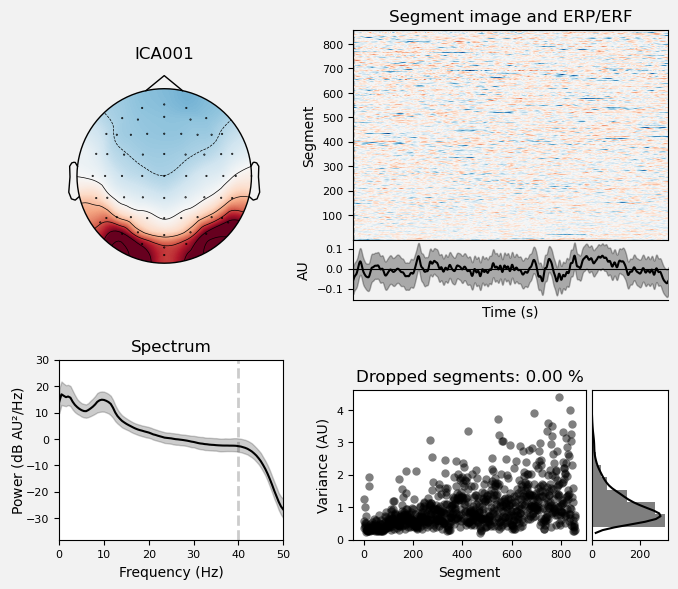

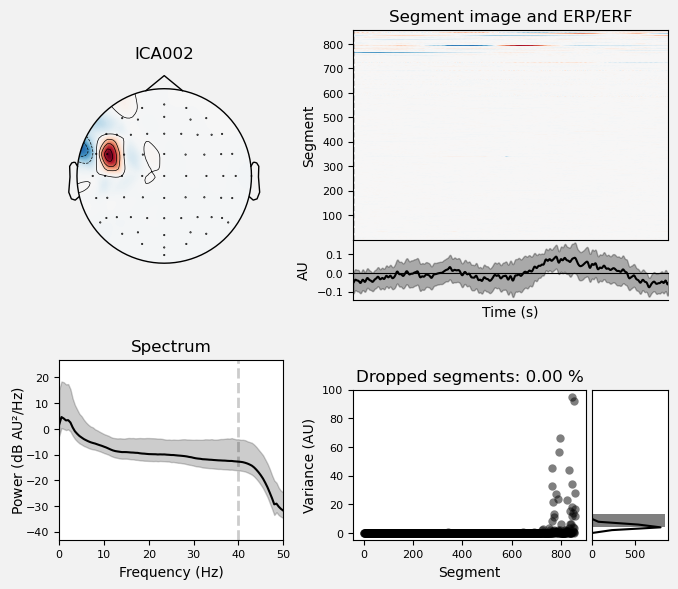

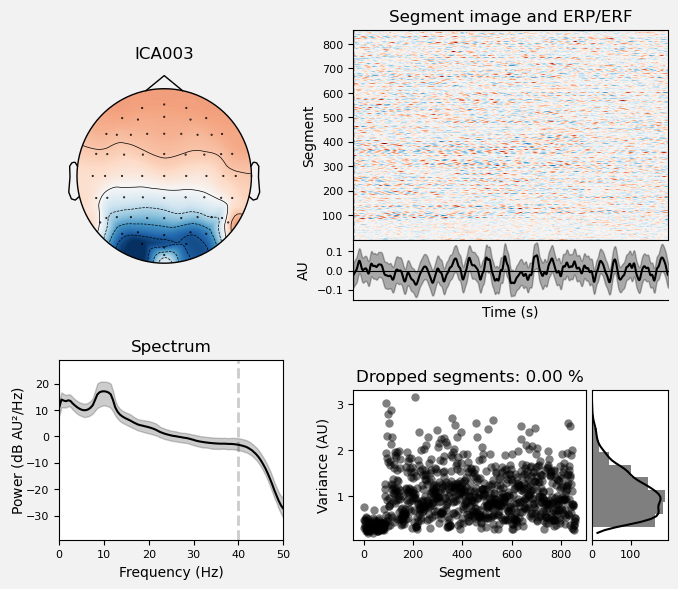

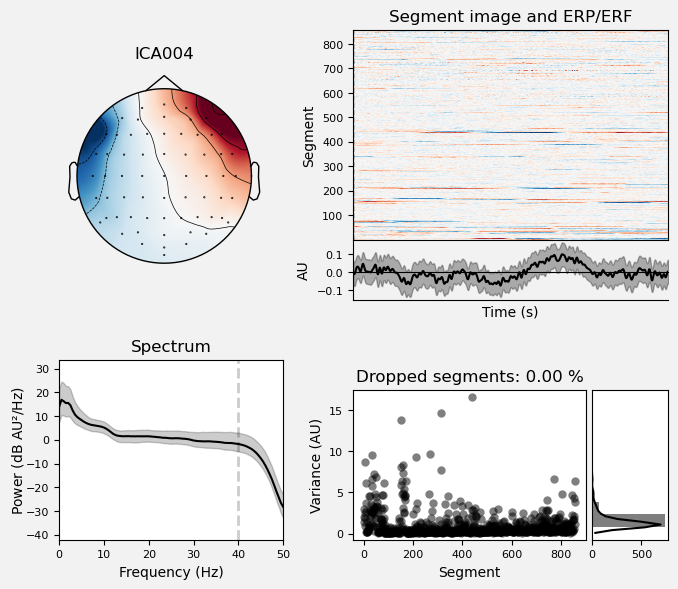

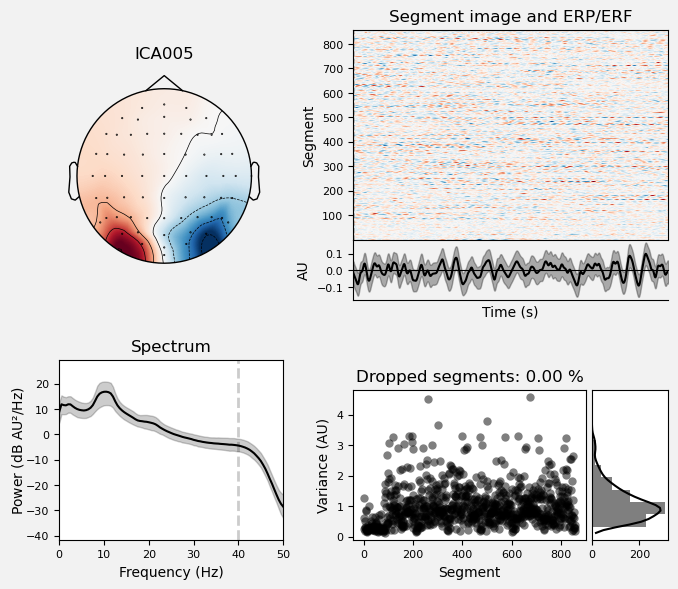

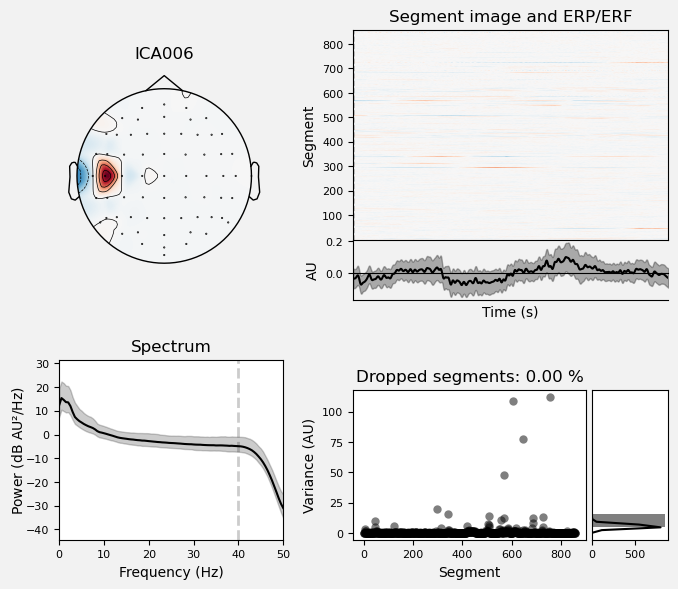

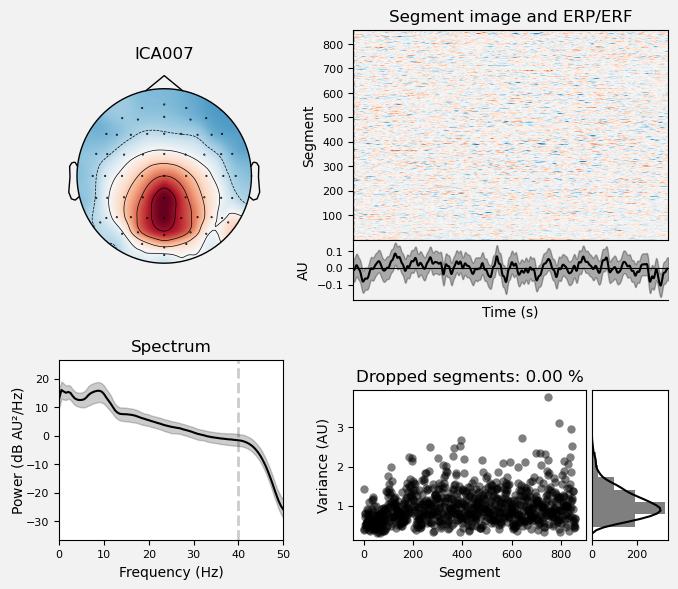

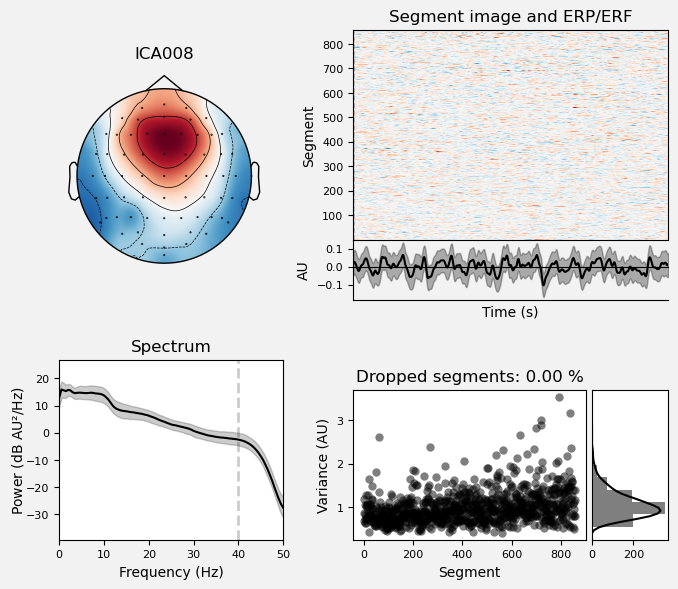

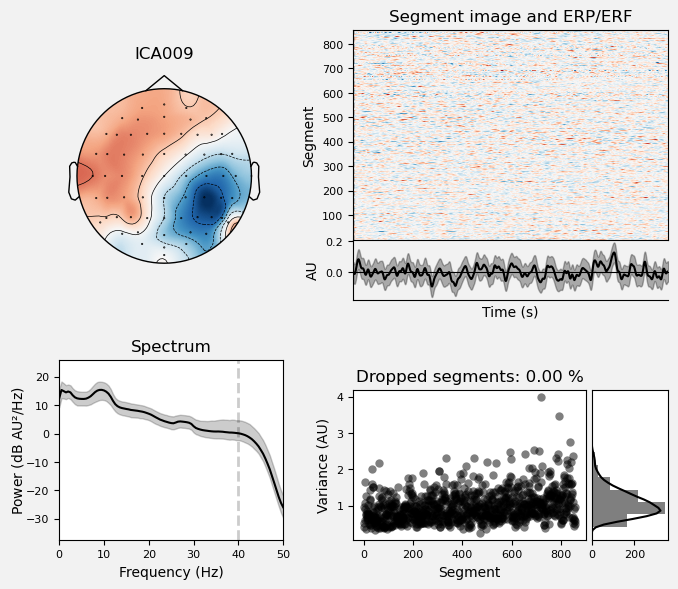

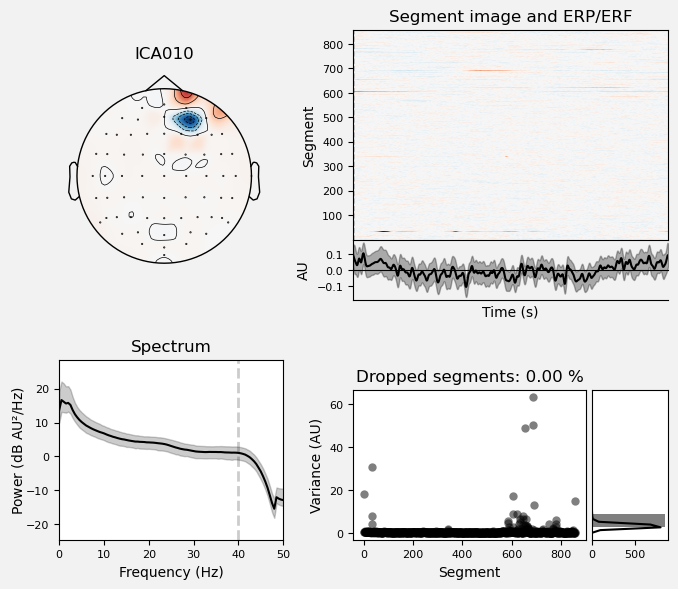

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [19]:
ica.plot_properties(raw_copy, picks= [1,2,3,4,5,6,7,8,9,10])

Not setting metadata
495 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 495 events and 501 original time points ...
436 bad epochs dropped


C:\Users\uSer\AppData\Local\Temp\ipykernel_26780\3227751108.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = epochs.plot(events=events)


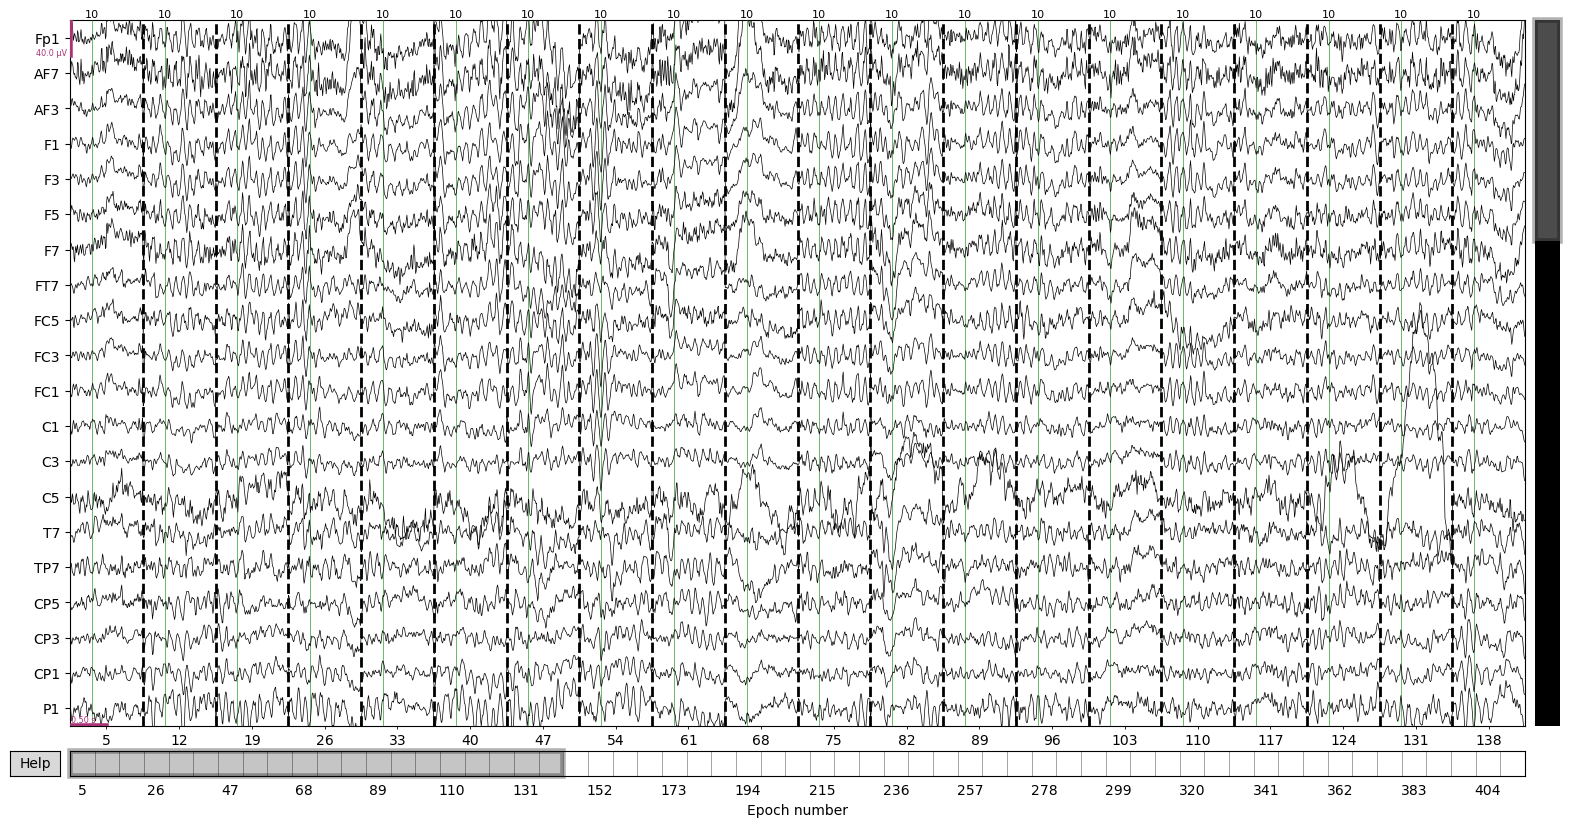

In [20]:
epochs = mne.Epochs(raw_copy, events, event_id=event_id, tmin=-0.3, tmax=0.7, preload=True)
fig = epochs.plot(events=events)